# Introduce with cleanning data in `Pandas`

In [1]:
import pandas as pd
import numpy as np


In [2]:
a = pd.Series([1,2,30,np.nan, None])

In [3]:
a

0     1.0
1     2.0
2    30.0
3     NaN
4     NaN
dtype: float64

In [4]:
a[~a.isnull()]

0     1.0
1     2.0
2    30.0
dtype: float64

In [5]:
np.inf

inf

In [6]:
np.nan


nan

In [7]:
np.isinf?

Call signature:  np.isinf(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'isinf'>
File:            c:\users\alex\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:      
isinf(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Test element-wise for positive or negative infinity.

Returns a boolean array of the same shape as `x`, True where ``x ==
+/-inf``, otherwise False.

Parameters
----------
x : array_like
    Input values
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will b

In [8]:
b = pd.DataFrame([1,2,3,4,5,6,7,8,0, None, np.nan, np.inf], columns=['numbers'])

In [9]:
b

,numbers
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,0.0
9,NaN


In [10]:
b.sum()

numbers    inf
dtype: float64

In [11]:
b.mean()

numbers    inf
dtype: float64

In [12]:
b = b.loc[b.notnull()['numbers'] == True]
b

,numbers
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,0.0
11,inf


In [13]:
b = b.loc[np.isinf(b)['numbers'] == False]

In [14]:
b

,numbers
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,0.0


In [15]:
np.nan

nan

In [16]:
np.inf

inf

In [17]:
a = pd.DataFrame([1,2,3,np.nan, None, np.inf], columns=['numbers'])

In [18]:
a

,numbers
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,inf


In [19]:
a = a.dropna()
a

,numbers
0,1.0
1,2.0
2,3.0
5,inf


In [20]:
a.describe()

,numbers
count,4.00
mean,inf
std,NaN
min,1.00
25%,1.75
50%,2.50
75%,inf
max,inf


In [21]:
a.append

<bound method DataFrame.append of    numbers
0      1.0
1      2.0
2      3.0
5      inf>

In [22]:
a = a[~np.isinf(a)]
a

,numbers
0,1.0
1,2.0
2,3.0
5,NaN


In [23]:
a = a[~np.isnan(a)]

In [24]:
np.isinf(a)

,numbers
0,False
1,False
2,False
5,False


In [25]:
a.dropna()

,numbers
0,1.0
1,2.0
2,3.0


In [26]:
a

,numbers
0,1.0
1,2.0
2,3.0
5,NaN


In [27]:
a = a[np.isinf(a) == False]

In [28]:
a

,numbers
0,1.0
1,2.0
2,3.0
5,NaN


In [29]:
a.fillna(0)
a

,numbers
0,1.0
1,2.0
2,3.0
5,NaN


In [30]:
a = a.dropna()

In [31]:
a

,numbers
0,1.0
1,2.0
2,3.0


# TASK `Clean`

In [32]:
file1 = pd.read_csv('data/btc-eth-prices-original.csv')
file1

,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23
...,...,...,...
360,2018-03-28,7960.380000,445.93
361,2018-03-29,7172.280000,383.90
362,2018-03-30,6882.531667,393.82
363,2018-03-31,6935.480000,394.07


In [33]:
file1.head()

,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23


In [34]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Bitcoin    365 non-null    float64
 2   Ether      362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [35]:
file1.shape[0]

365

In [36]:
pd.isnull(file1).value_counts()

Timestamp  Bitcoin  Ether
False      False    False    362
                    True       3
dtype: int64

# find 3 nan position

In [37]:
file1 = file1.dropna()

In [38]:
file1.shape

(362, 3)

In [39]:
file1.describe()

,Bitcoin,Ether
count,362.000000,362.000000
mean,6285.150614,429.927514
std,4472.524539,308.254288
min,1099.169125,42.310000
25%,2567.935293,238.525000
50%,4534.553810,308.825000
75%,9087.773333,657.502500
max,19498.683333,1385.020000


In [40]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  362 non-null    object 
 1   Bitcoin    362 non-null    float64
 2   Ether      362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [41]:
pd.isnull(file1).value_counts()

Timestamp  Bitcoin  Ether
False      False    False    362
dtype: int64

In [42]:
file1 = round(file1[['Bitcoin', 'Ether']],1)

In [43]:
file1.tail(50)

,Bitcoin,Ether
315,8343.5,811.2
316,8811.3,865.3
317,8597.8,841.0
318,9334.6,920.1
319,9977.2,928.0
320,10127.2,938.0
321,10842.0,974.8
322,10503.3,913.9
323,11111.0,939.8
324,11390.4,885.5


# DONE

In [44]:
file2 = pd.read_csv('data/btc-eth-prices-outliers.csv')

In [45]:
file2.head()

,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23


In [46]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Bitcoin    365 non-null    float64
 2   Ether      362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [47]:
pd.isnull(file2).value_counts()

Timestamp  Bitcoin  Ether
False      False    False    362
                    True       3
dtype: int64

# Same file

In [48]:
# 3

In [49]:
file3 = pd.read_csv('data/btc-market-price-full.csv', header=None)

In [50]:
file3.head()

,0,1
0,2009-01-03 00:00:00,0.0
1,2009-01-05 00:00:00,0.0
2,2009-01-07 00:00:00,0.0
3,2009-01-09 00:00:00,0.0
4,2009-01-11 00:00:00,0.0


In [51]:
file3.columns= ['Timestamp', 'Price']

In [52]:
file3

,Timestamp,Price
0,2009-01-03 00:00:00,0.000000
1,2009-01-05 00:00:00,0.000000
2,2009-01-07 00:00:00,0.000000
3,2009-01-09 00:00:00,0.000000
4,2009-01-11 00:00:00,0.000000
...,...,...
1683,2018-03-23 00:00:00,8686.826667
1684,2018-03-25 00:00:00,8617.296667
1685,2018-03-27 00:00:00,7876.195000
1686,2018-03-29 00:00:00,7172.280000


In [53]:
pd.to_datetime(file3['Timestamp'])

0      2009-01-03
1      2009-01-05
2      2009-01-07
3      2009-01-09
4      2009-01-11
          ...    
1683   2018-03-23
1684   2018-03-25
1685   2018-03-27
1686   2018-03-29
1687   2018-03-31
Name: Timestamp, Length: 1688, dtype: datetime64[ns]

In [54]:
file3['Timestamp'] = pd.to_datetime(file3['Timestamp'])

In [55]:
file3.set_index('Timestamp', inplace=True)

In [56]:
file3

,Price
Timestamp,
2009-01-03,0.000000
2009-01-05,0.000000
2009-01-07,0.000000
2009-01-09,0.000000
2009-01-11,0.000000
...,...
2018-03-23,8686.826667
2018-03-25,8617.296667
2018-03-27,7876.195000


In [57]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2009-01-03 to 2018-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1688 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB


In [58]:
file3.shape

(1688, 1)

<AxesSubplot:xlabel='Timestamp'>

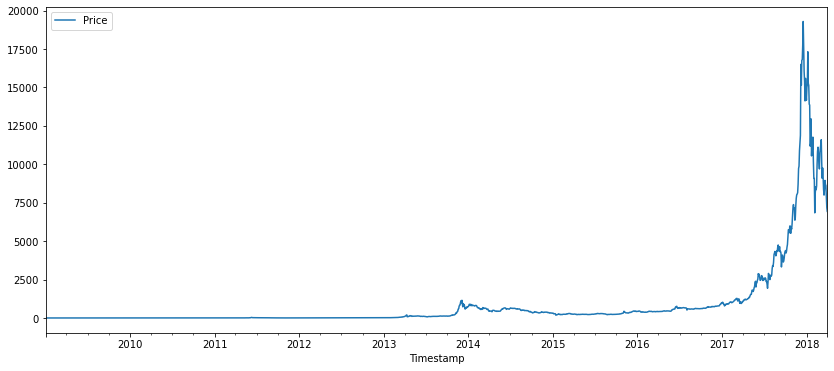

In [59]:
file3.plot(figsize=(14,6))

In [60]:
a = file3.loc[(file3['Price'] != 0)]

<AxesSubplot:xlabel='Timestamp'>

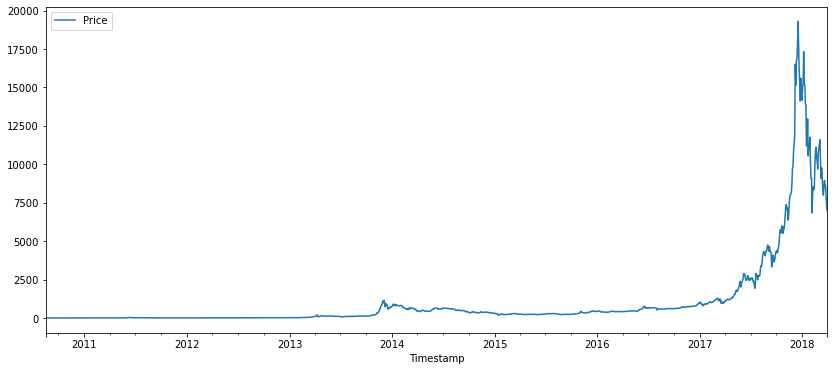

In [61]:
a.plot(figsize=(14,6))

In [62]:
file3.head()

,Price
Timestamp,
2009-01-03,0.0
2009-01-05,0.0
2009-01-07,0.0
2009-01-09,0.0
2009-01-11,0.0


In [63]:
file3['Price'].value_counts()

0.000000       296
0.900000         3
5.000000         3
12.000000        3
5.160000         3
              ... 
130.450000       1
411.890000       1
417.990000       1
5711.205867      1
447.370000       1
Name: Price, Length: 1358, dtype: int64

In [64]:
pd.isnull(file3).value_counts()

Price
False    1688
dtype: int64

In [65]:
file3.describe()

,Price
count,1688.000000
mean,885.205109
std,2438.802310
min,0.000000
25%,1.887750
50%,123.980000
75%,576.253500
max,19289.785000


In [66]:
file3.dropna()

,Price
Timestamp,
2009-01-03,0.000000
2009-01-05,0.000000
2009-01-07,0.000000
2009-01-09,0.000000
2009-01-11,0.000000
...,...
2018-03-23,8686.826667
2018-03-25,8617.296667
2018-03-27,7876.195000


In [67]:
file1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 362, dtype: bool

In [70]:
file2.duplicated().value_counts()

False    365
dtype: int64

In [74]:
file3.duplicated().value_counts()

False    1358
True      330
dtype: int64

In [78]:
file3.drop_duplicates(keep=False).duplicated().value_counts()

False    1326
dtype: int64

In [80]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2009-01-03 to 2018-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1688 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB


In [82]:
file3.head()

,Price
Timestamp,
2009-01-03,0.0
2009-01-05,0.0
2009-01-07,0.0
2009-01-09,0.0
2009-01-11,0.0


In [84]:
file3.duplicated(subset=['Timestamp'])

KeyError: Index(['Timestamp'], dtype='object')

In [86]:
file3.reindex()

,Price
Timestamp,
2009-01-03,0.000000
2009-01-05,0.000000
2009-01-07,0.000000
2009-01-09,0.000000
2009-01-11,0.000000
...,...
2018-03-23,8686.826667
2018-03-25,8617.296667
2018-03-27,7876.195000


In [88]:
file3 = file3.reset_index()

In [89]:
file3

,Timestamp,Price
0,2009-01-03,0.000000
1,2009-01-05,0.000000
2,2009-01-07,0.000000
3,2009-01-09,0.000000
4,2009-01-11,0.000000
...,...,...
1683,2018-03-23,8686.826667
1684,2018-03-25,8617.296667
1685,2018-03-27,7876.195000
1686,2018-03-29,7172.280000


In [91]:
file3.duplicated(subset=['Timestamp']).value_counts()

False    1688
dtype: int64

In [93]:
file3.duplicated(subset=['Price']).value_counts()

False    1358
True      330
dtype: int64

In [95]:
file3 = file3.drop_duplicates(subset=['Price'])

In [103]:
a = file3.iloc(0)


In [144]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [145]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [146]:
df =df['Data'].str.split('_', expand=True)
df.columns = ['Year', 'Sex', 'Country', 'Children']
df

,Year,Sex,Country,Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [147]:
df['Year'] = df['Year'].str.rstrip('\?')
df

,Year,Sex,Country,Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [148]:
df

,Year,Sex,Country,Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [149]:
df['Country'] = df['Country'].str.replace(' ','')

In [150]:
df

,Year,Sex,Country,Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,IT,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      5 non-null      object
 1   Sex       5 non-null      object
 2   Country   5 non-null      object
 3   Children  5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [152]:
df['Year'] = pd.to_numeric(df['Year'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      5 non-null      int64 
 1   Sex       5 non-null      object
 2   Country   5 non-null      object
 3   Children  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [141]:
df

,Year,Sex,Country,Children
0,1987-01-01,M,US,1
1,1990-01-01,M,UK,1
2,1992-01-01,F,US,2
3,1970-01-01,M,IT,1
4,1985-01-01,F,IT,2


In [157]:
df.size, df.shape

(20, (5, 4))